# -----------------------------librerías extra

In [1]:
using ProgressMeter
using Cubature
using PyPlot

In [2]:
using Graf
using nintegrate

# ----------------------------constantes

### ----------------------------

In [3]:
const hbarr=6.62606957e-34;
const Kb=1.3806488e-23
m=144.42e-27/2;

lambda=1

omegaz =150.0
omegar =lambda*omegaz;

Npart=10.0^7.0;
n=10.0^20.0;
alfa=5.8e-9;
g_alfa=4.0*π*hbarr^2*alfa/m;
omegam=(omegar^2*omegaz)^(1/3);
mu=(hbarr/2) *(2*sqrt(omegar)+omegaz)#0.5*hbarr*omegam*(15*Npart*alfa*sqrt(m*omegam/hbarr))^(2.0/5.0);
c = sqrt(n*g_alfa/m);


#------------Parámetros característicos del solitón bosónico
ksi=1/sqrt(4*pi*n*alfa);
beta=0.0;
algo=11.0

z0=algo*ksi;
gama=1/(sqrt(1-beta^2));

In [4]:
#unidades 0A
EOA=hbarr*omegam;
tOA=1/omegam;
lOA=sqrt(hbarr/(m*omegam));


# El Tiempo

In [25]:
DT=100;
t1=ksi/c;
t0=tOA/DT;
t1=t1/DT;

In [26]:
t0/(ksi/c)

4.4586691262729605

In [27]:
#########EN UNIDADES dependientes del tiempo

N_est=(m/hbarr)^(3/2)*omegar*sqrt(omegaz)/sqrt(2*π);


function sol(z::Float64,t)
    tanh((z*sqrt(abs(sin(omegaz*t)))-z0)/(ksi*gama))/gama
end

function fase_rr1(r1::Float64,r::Float64,t::Float64)
    (m*omegar/(2*hbarr))*((r1^2+r^2)*cos(omegar*t))+π/4
end

function fase_zz1(z1::Float64,z::Float64,t::Float64)
    (m*omegaz/(2*hbarr))*((z1^2+z^2)*cos(omegaz*t)-2*z*z1)
end


function Bessel0(r1::Float64,r::Float64)
    besselj0(abs(m*omegar*r*r1/hbarr))
end

function U(r::Float64,z::Float64,t::Float64)
    0.5*(m)*((omegar*r)^2*sin(omegar*t) + (omegaz*z)^2*sin(omegaz*t))
end



function n_tf(r::Float64,z::Float64,t::Float64)            
    if  mu-U(r,z,t)>0 0
        return (mu-U(r,z,t))/(n*g_alfa)              
    end
    return 0       
end


function Rre(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*cos(fase_rr1(r1,r,t))
end


function Rim(r1::Float64,r::Float64,t::Float64)
    Bessel0(r1,r)*r1*sin(fase_rr1(r1,r,t))
end


function Zre(z1::Float64,z::Float64,t::Float64)
    cos(fase_zz1(z1,z,t))*sol(z1,t)-beta*sin(fase_zz1(z1,z,t))
end

function Zim(z1::Float64,z::Float64,t::Float64)
    sin(fase_zz1(z1,z,t))*sol(z1,t)+beta*cos(fase_zz1(z1,z,t))
end


function R_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)-Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)
end


function I_funcion_a_integrar(r1::Float64,z1::Float64,r::Float64,z::Float64,t::Float64)
    Rre(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zim(z1,z,t)+Rim(r1,r,t)*sqrt(n_tf(r1,z1,t))*Zre(z1,z,t)
end


R_funcion_a_integrar(v::Vector{Float64},r,z,t)=R_funcion_a_integrar(v[1],v[2],r,z,t)

I_funcion_a_integrar(v::Vector{Float64},r,z,t)=I_funcion_a_integrar(v[1],v[2],r,z,t)


I_funcion_a_integrar (generic function with 2 methods)

In [28]:
rmax_estatico=sqrt(2*mu/(m*omegar^2))
zmax_estatico=sqrt(2*mu/(m*omegaz^2))


function rmaxintegrar(t::Float64)
    rmax_estatico/sqrt(abs(sin(omegar*t)))
end

function zmaxintegrar(t::Float64)
    zmax_estatico/sqrt(abs(sin(omegaz*t)))
end



rmaxevaluar=5*rmax_estatico;
zmaxevaluar=5*zmax_estatico;


In [29]:
rmaxevaluar/lOA

5.392817714760867

In [30]:
zmaxevaluar/lOA

5.392817714760867

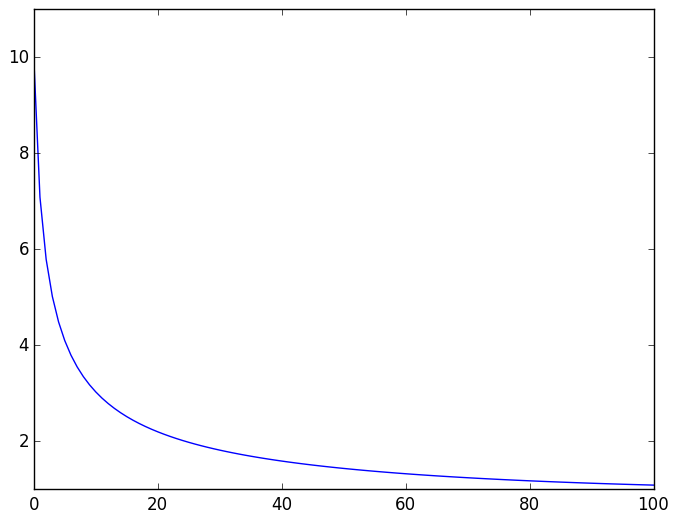

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f48a0954610>

In [31]:
tiempos=linspace(t0,100*t0,101);
rmax=zeros(101);
zmax=zeros(101);
[rmax[i]=rmaxintegrar(tiempos[i])/rmax_estatico for i in 1:101]; 
[zmax[i]=zmaxintegrar(tiempos[i])/zmax_estatico for i in 1:101]; 

plot(zmax)


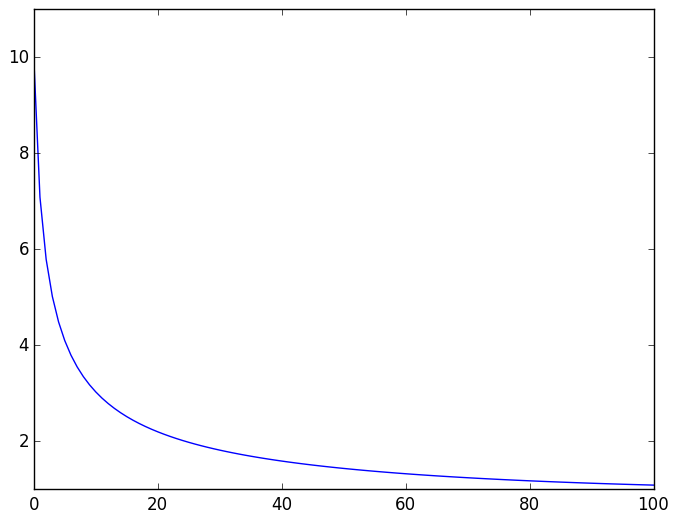

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f48a087bc50>

In [32]:
plot(rmax)

# ----------------------------------------------------------------------------------------------

#Parámetros de resolución

In [34]:
iteracionest=10;
divisiones=10;

iteracionesr=Integer(100);
iteracionesz=Integer(100);

iteracionesr1=iteracionesr+(divisiones-1)*(iteracionesr-1);
iteracionesz1=iteracionesz+(divisiones-1)*(iteracionesz-1);


Dr=rmaxevaluar/iteracionesr;
Dz=2*zmaxevaluar/iteracionesz;

Dr1(t)=rmaxintegrar(t)/iteracionesr1;
Dz1(t)=2*zmaxintegrar(t)/iteracionesz1;

## Arreglos prehechos para guardar todo:

In [35]:
ReIntegralcubature=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
ImIntegralcubature=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
Zcubature=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
ErrIm=zeros(iteracionesr+1,iteracionesz+1,iteracionest);
ErrRe=zeros(iteracionesr+1,iteracionesz+1,iteracionest);

In [36]:
rmaxintegrar(t0)/lOA

10.785725310491086

In [48]:
zmax_estatico/lOA

1.0785635429521734

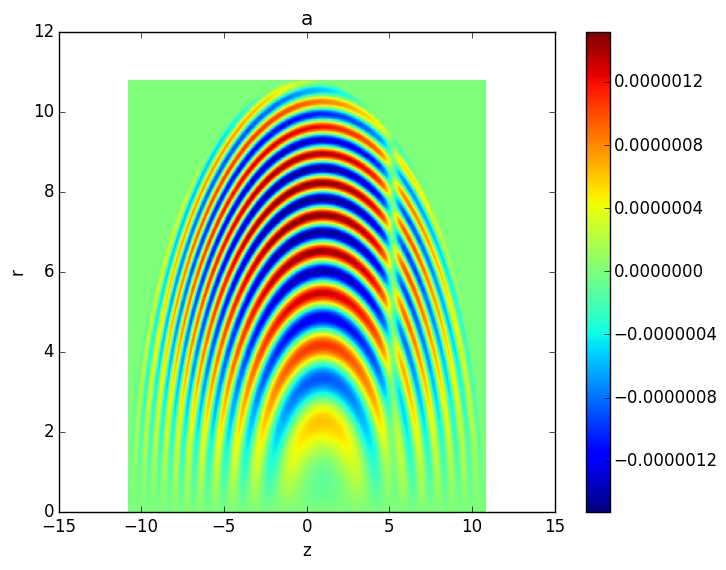

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f48a05a65f0>

In [51]:
f1(v)=R_funcion_a_integrar(v,0.0,lOA,t0)
zf1=gencodominio2Dvec([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,f1)
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t0)/lOA],1000,zf1,"a","z","r","barra")

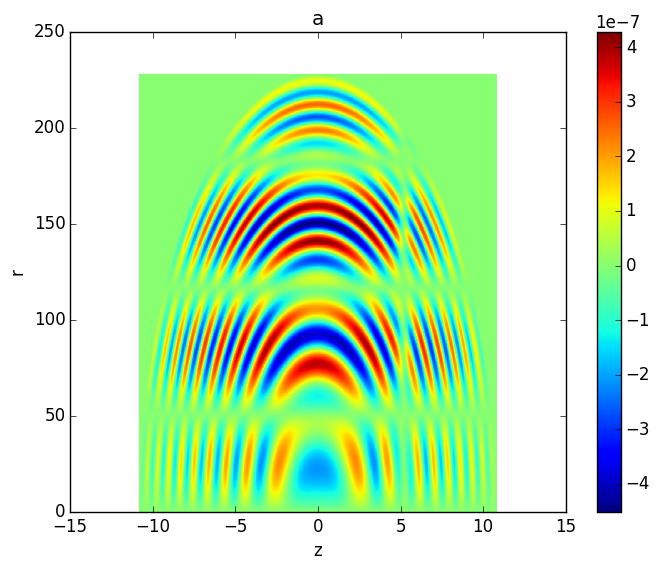

PyObject <matplotlib.colorbar.Colorbar instance at 0x7f48a03f40e0>

In [52]:
f2(v)=I_funcion_a_integrar(v,lOA,0.0,t0)
zf2=gencodominio2Dvec([-zmaxintegrar(t0),zmaxintegrar(t0)],[0.0,rmaxintegrar(t0)],1000,f2)
grafdensidad([-zmaxintegrar(t0)/lOA,zmaxintegrar(t0)/lOA],[0.0,rmaxintegrar(t1)/lOA],1000,zf2,"a","z","r","barra")

In [40]:
#tiempos=[5,6,7,8,9]

#q=Progress(iteracionest+1,1)

for τ in 1:iteracionest
    
    t=τ*t0
    zmax=zmaxintegrar(t)
    rmax=rmaxintegrar(t)
    
    println("rmax/lOA====================$(rmax/lOA)") 
    println("zmax/lOA====================$(zmax/lOA)")
    
    p=Progress(iteracionesr+1,1)
    
    for i in 1: iteracionesr+1    
        #println("i====================$i") 
        r=(i-1)*Dr;    
       #println("r=============================================$r") 
            
        for j in 1: iteracionesz+1
        #println("j===========$j") 
            z=-zmaxevaluar+(j-1)*Dz;    
            #println("z======================$z") 

        
#          i1=i+(divisiones-1)*(i-1);
#        kmin= valor_i_abajo(i1,drk0); #i-Dr1 expresado en la malla de integración con reglas
    #        kmax= valor_i_arriba(i1,drk0,iteracionesr1); #i1+Dr1 con reglas

            
#            j1=j+(divisiones-1)*(j-1);    
#            lmin= valor_i_abajo(j1,dzl0);  #j-Dz1 expresado en la malla de integración con reglas
#            lmax= valor_i_arriba(j1,dzl0,iteracionesz1); #j+Dz1 expresado en la malla de integración con reglas

            
          
#            for k in kmin: kmax #induce error de redondeo    
                #for k in 1: iteracionesr1+1
#                    r1=(k-1)*Dr1;

            #println("k====$k") 
                    #println("r1===============$r1")
                    #println("kmax====$(indicializar(r1_maximo,rminintegrar,Dr1))")

                    #println("r1===","$r1")

                
#                for l in lmin: lmax #induce error de redondeo
#                z1=zminevaluar+(l-1)*Dz1;
                            #println("l==$l")   
                            #println("$(indicializar(r1_minimo,rminintegrar,Dr1))", "$(indicializar(r1_maximo,rminintegrar,Dr1))")
                            #println("lmin==$(indicializar(z1_minimo,zminintegrar,Dz1))")
                            #println("lmax==$(indicializar(r1_minimo,zminintegrar,Dz1))")
                            #println("z1=","$z1")



                    

                            #Llamando los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:

                            #ReIntegral[i,j,τ]=ReIntegral[i,j,τ]+n_tf(r1,z1)*(fRre[i,k,τ]*gZre[j,l,τ]-fRim[i,k,τ]*gZim[j,l,τ])*Dr1*Dz1;   
                            #ImIntegral[i,j,τ]=ImIntegral[i,j,τ]+n_tf(r1,z1)*(fRre[i,k,τ]*gZim[j,l,τ]+fRim[i,k,τ]*gZre[j,l,τ])*Dr1*Dz1;


                            #Sin llamar los arreglos ya hechos para mapear las funciones en r,r1 y en z,z1:
                            #ReIntegral[i,j,τ]=ReIntegral[i,j,τ]+n_tf(r1,z1)*(Rre(r,r1,t)*Zre(z,z1,t)-Rim(r,r1,t)*Zim(z,z1,t))*Dr1*Dz1;
                            #ImIntegral[i,j,τ]=ReIntegral[i,j,τ]+n_tf(r1,z1)*(Rre(r,r1,t)*Zim(z,z1,t)+Rim(r,r1,t)*Zre(z,z1,t))*Dr1*Dz1;
            
            
            
            
            
                            #Si QUIERES usar los programas anteriores debes quitar las integraciones en k y l y usar:
                               f(v)=R_funcion_a_integrar(v,r,z,t);
                               g(v)=I_funcion_a_integrar(v,r,z,t);
                               
                               
            
                        
                                (val,err) = pcubature(f,[0.0,-zmax],[rmax,zmax]; reltol=1e-20, abstol=1e-20, maxevals=10000000);
                                (val2,err2) = pcubature(g,[0.0,-zmax],[rmax,zmax]; reltol=1e-20, abstol=1e-20, maxevals=10000000);
                            
            
                                ReIntegralcubature[i,j,τ]=val
                                ImIntegralcubature[i,j,τ]=val2    
                                ErrRe[i,j,τ]=err;  
                                ErrIm[i,j,τ]=err2;
          
 #                       end 
        
       
 #               end
        
            end
        next!(p)
    
        end
    #Z[:,:,τ]=Ncuad(t)*(ReIntegral[:,:,τ].^2+ImIntegral[:,:,τ].^2);
    Zcubature[:,:,τ]=N_est^2*(ReIntegralcubature[:,:,τ].^2+ImIntegralcubature[:,:,τ].^2);
    
 
    grafdensidad([-zmaxevaluar/lOA,zmaxevaluar/lOA],[0,rmaxevaluar/lOA],iteracionesr+1,Zcubature[:,:,τ],"Perfil Propagado a t=$τ *T0/$DT","z","r")    
    savefig("fig$τ entre $DT con zmaxevaluar de $(zmaxevaluar/zmax_estatico) y zmaxevaluar=$(zmaxevaluar/zmax_estatico) de $iteracionesz*$iteracionesr.png")
    writedlm("salida se soliton real a tiempos t0*$τ con DT=$DT.dat",Zcubature[:,:,τ])

    #next!(q)
zmaxevaluar
end

rmax/lOA====================10.785725310491086


LoadError: LoadError: InterruptException:
while loading In[40], in expression starting on line 5

# Zcubature(t0) y Z1(t1)

B=zeros(101,101,10);
for i in 1:5
    comodin=readdlm("salida se soliton real a tiempos t0*$i.dat")
    B[:,:,i]=comodin
end


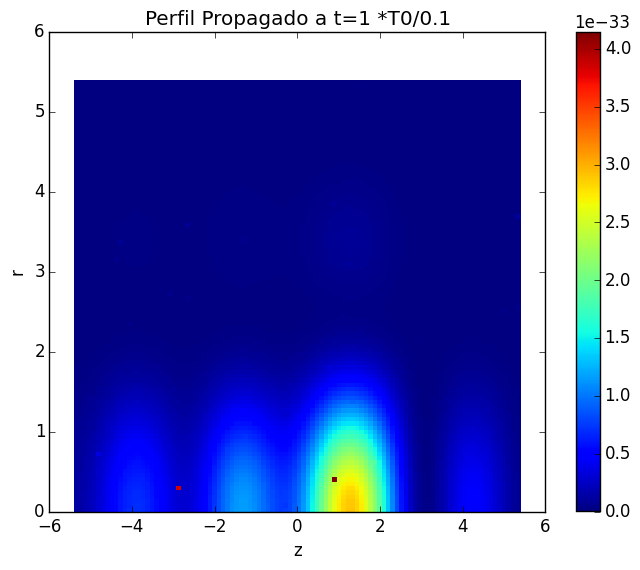

In [31]:
for τ in 1
    t=τ*t0
    grafdensidad([-zmaxevaluar/lOA,zmaxevaluar/lOA],[0,rmaxevaluar/lOA],iteracionesr+1,Zcubature[:,:,τ],"Perfil Propagado a t=$τ *T0/$DT","z","r","color")    
    #savefig("fig$τ entre $DT con $drk0 de r y $dzl0 de z resol de $iteracionesz*$iteracionesr.png")
    #writedlm("salida se soliton real a tiempos t0*$τ con DT=$DT.dat",Zcubature[:,:,τ])
end

In [32]:
Zcubature==zeros(101,101,10)

false

In [33]:
zmax_estatico/lOA

1.0785635429521734

In [35]:
zmaxevaluar/ksi

113.87237094320705

In [36]:
rmaxintegrar/ksi

LoadError: LoadError: MethodError: `/` has no method matching /(::Function, ::Float64)
Closest candidates are:
  /(!Matched::Float64, ::Float64)
  /(!Matched::Complex{T<:Real}, ::Real)
  /(!Matched::BigFloat, ::Union{Float16,Float32,Float64})
  ...
while loading In[36], in expression starting on line 1

In [ ]:
NOA=(m/sqrt(2*π))*(omegar/hbarr)*sqrt(omegaz/omegam);

sol_OA(z,t)=sol(z/lOA,t/tOA)
fase_rr1_OA(r1,r,t)=fase_rr1(r1/lOA,r/lOA,t/tOA)
fase_zz1_OA(z1,z,t)=fase_zz1(z1/lOA,z/lOA,t/tOA)
Bessel0_OA(r1,r,t)=Bessel0(r1/lOA,r/lOA,t/tOA)
U_OA(r,z,t)=U(r/lOA,z/lOA,t/tOA)

function n_tf(r::Float64,z::Float64,t::Float64)            
    if  muOA-U_OA(r,z,t)>0 0
        return (muOA-U_OA(r,z,t))/(nOA*g_alfa_OA)              
    end
    return 0       
end

Rre_OA(r1,r,t)=Rre(r1/lOA,r/lOA,t/tOA)
Rim_OA(r1,r,t)=Rim(r1/lOA,r/lOA,t/tOA)
Zre_OA(z1,z,t)=Zre(z1/lOA,z/lOA,t/tOA)
Zim_OA(z1,z,t)=Zim(z1/lOA,z/lOA,t/tOA)
R_funcion_a_integrar_OA(r1,z1,r,z,t)=R_funcion_a_integrar(r1/lOA,z1/lOA,r/lOA,z/lOA,t/tOA)
I_funcion_a_integrar_OA(r1,z1,r,z,t)=I_funcion_a_integrar(r1/lOA,z1/lOA,r/lOA,z/lOA,t/tOA)



R_funcion_a_integrar(v::Vector{Float64},r,z,t)=R_funcion_a_integrar(v[1],v[2],r,z,t)
I_funcion_a_integrar(v::Vector{Float64},r,z,t)=I_funcion_a_integrar(v[1],v[2],r,z,t)
R_funcion_a_integrar_OA(v::Vector{Float64},r,z,t)=R_funcion_a_integrar_OA(v[1],v[2],r,z,t)
I_funcion_a_integrar_OA(v::Vector{Float64},r,z,t)=I_funcion_a_integrar_OA(v[1],v[2],r,z,t)